In [67]:
import numpy as np
import matplotlib.pyplot as plt
import fit

In [68]:
def f(x):
    return 2 * np.sin(0.5 * x + 0.78) + 0.8

## GENERO 6 VALORI DISTRIBUITI ATTORNO A f(x) CON GAUSSIANA DI MEDIA 0 E SIGMA 0.3

In [69]:
from myrand import generate_TCL_ms

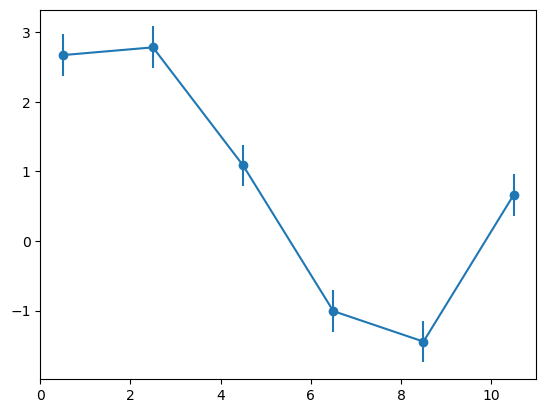

In [70]:
x_coord = [0.5, 2.5, 4.5, 6.5, 8.5, 10.5]
y_coord = list(map(lambda k:sum(k), zip([f(x) for x in x_coord], generate_TCL_ms(0., 0.3, 6))))
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.errorbar(x_coord, y_coord, yerr = 0.3, marker = 'o');

## FARE IL FIT DEI DATI GENERATI USANDO FUNZIONE A 4 PARAMETRI

In [71]:
def f_fit(x, p0, p1, p2, p3):
  return p0 * np.sin(p1 * x + p2) + p3

In [72]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
least_squares = LeastSquares(x_coord, y_coord, 0.3, f_fit)
fit = Minuit(least_squares, p0 = 2, p1 = 0.5, p2 = 0.78, p3 = 0.8)
fit.migrad()
fit.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.5418 (χ²/ndof = 0.3)     │              Nfcn = 110              │
│ EDM = 1.25e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p0   │   2.30    │   0.18    │            │            │         │         │       │
│ 1 │ p1   │   0.526   │   0.024   │            │            │         │         │       │
│ 2 │ p2   │   0.67    │   0.17    │            │            │         │         │       │
│ 3 │ p3   │   0.79    │   0.13    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────┐
│    │       p0       p1       p2       p3 │
├────┼─────────────────────────────────────┤
│ p0 │   0.0319   1.0e-3   -0.007   -0.002 │
│ p1 │   1.0e-3 0.000563  -3.6e-3  -1.0e-3 │
│ p2 │   -0.007  -3.6e-3   0.0288    0.007 │
│ p3 │   -0.002  -1.0e-3    0.007   0.0169 │
└────┴─────────────────────────────────────┘

## STAMPA Q2 E P-VALUE

In [73]:
from scipy.stats import chi2
p_value = 1 - chi2.cdf(fit.fval, fit.ndof)
print(f'Q^2: {fit.fval}')
print(f'p-value : {p_value}')

Q^2: 0.5417865093495767
p-value : 0.762697906495982


## AGGIUNGO INCERTEZZA COMPLETAMENTE CORRELATA GENERATA GAUSSIANAMENTE (INCERTEZZA SISTEMATICA)

<ErrorbarContainer object of 3 artists>

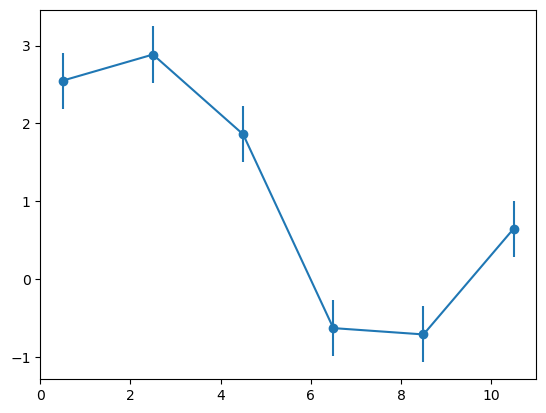

In [82]:
sig = 0.3
errori_gauss = generate_TCL_ms(0, sig, 6)                    #6 ERRORI GAUSSIANI DIFFERENTI 
errore_sistematico = 0.2                                     #1 ERRORE SISTEMATICO (COMPLETAMENTE CORRELATO)   
incertezza_tot = np.sqrt(sig**2 + errore_sistematico**2)     #somma quadratica dei 2 tipi di errore (da usare per errorbar)


y2_coord = list(map(lambda k:sum(k), zip([errore_sistematico + f(x) for x in x_coord], errori_gauss)))
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.errorbar(x_coord, y2_coord, yerr = incertezza_tot, marker = 'o')

In [83]:

least_squares2 = LeastSquares(x_coord, y2_coord, incertezza_tot, f_fit)
fit2 = Minuit(least_squares2, p0 = 2, p1 = 0.5, p2 = 0.78, p3 = 0.8)
fit2.migrad()
fit2.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.402 (χ²/ndof = 0.7)      │              Nfcn = 113              │
│ EDM = 5.19e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p0   │   2.03    │   0.22    │            │            │         │         │       │
│ 1 │ p1   │   0.532   │   0.030   │            │            │         │         │       │
│ 2 │ p2   │   0.49    │   0.21    │            │            │         │         │       │
│ 3 │ p3   │   1.09    │   0.15    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────┐
│    │       p0       p1       p2       p3 │
├────┼─────────────────────────────────────┤
│ p0 │   0.0478   1.9e-3    -0.01   -0.002 │
│ p1 │   1.9e-3 0.000933  -5.7e-3  -1.0e-3 │
│ p2 │    -0.01  -5.7e-3   0.0449    0.006 │
│ p3 │   -0.002  -1.0e-3    0.006   0.0228 │
└────┴─────────────────────────────────────┘

con l'aggiunta di errore sistematico mi aspetto più imprecisione e spostamento dal valore vero. 
## calcolo la stima dell'incertezza sulle misure

In [84]:
Q2 = fit2.fval
dof = fit2.ndof
err = (Q2 /dof) ** 0.5
print(err)

0.8372372500827424


## COMPARAZIONE DI DISTRIBUZIONI CHI2

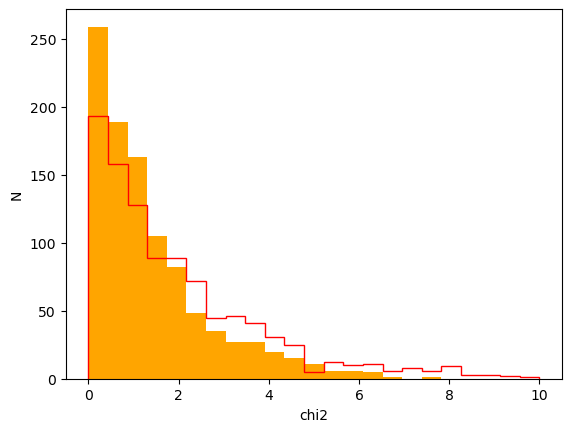

In [85]:
from mix import sturges

N_toys = 1000
chi2_fit1 = []
chi2_fit2 = []

for i in range (N_toys):
    x_coord = [0.5, 2.5, 4.5, 6.5, 8.5, 10.5]
    y_coord = list(map(lambda k:sum(k), zip([f(x) for x in x_coord], generate_TCL_ms(0., 0.3, 6))))
    leas_squares = LeastSquares(x_coord, y_coord, 0.3, f_fit)
    fitt = Minuit(leas_squares, p0 = 2, p1 = 0.5, p2 = 0.78, p3 = 0.8)
    fitt.migrad()
    chi = fitt.fval
    chi2_fit1.append(chi)

for i in range (N_toys):
    x_coord = [0.5, 2.5, 4.5, 6.5, 8.5, 10.5]
    errori_gauss = generate_TCL_ms(0, 0.3, 6)
    errore_sist = 0.2
    errore_sist_vero = generate_TCL_ms(0, 0.2, 1)
    sist = []
    for i in range (5): sist.append(errore_sist_vero)
    y2_coord = list(map(lambda k:sum(k), zip([0.2 + f(x) for x in x_coord], errori_gauss + sist)))
    least_squere2 = LeastSquares(x_coord, y2_coord, incertezza_tot, f_fit)
    fitt = Minuit(least_squere2, p0 = 2, p1 = 0.5, p2 = 0.78, p3 = 0.8)
    fitt.migrad()
    chi = fitt.fval
    chi2_fit2.append(chi)

fig, ax = plt.subplots(nrows = 1, ncols = 1)
n_bins = sturges(1000)
bin_edges = np.linspace(0, 10, n_bins)
ax.hist(chi2_fit1, bins = bin_edges, color = 'red', histtype = 'step', label = 'no sistematico');
ax.hist(chi2_fit2, bins = bin_edges, color = 'orange', label = 'sistematico');
ax.set_ylabel('N');
ax.set_xlabel('chi2');

Dal grafico è evidente che il secondo fit (arancione) è influenzato dall'errore non casuale, la distribuzione del chi2 è infatti più spostata verso lo 0 in quanto l'errore sistematico ha aumentato l'incertezza. In caso avessi aggiunto un sistematico molto maggiore al causale, avrei un chi2 completamente spostato sullo 0 (sovra-accordo)